# TODO: Do not use

In [1]:
import numpy as np
import matplotlib.pyplot as plt

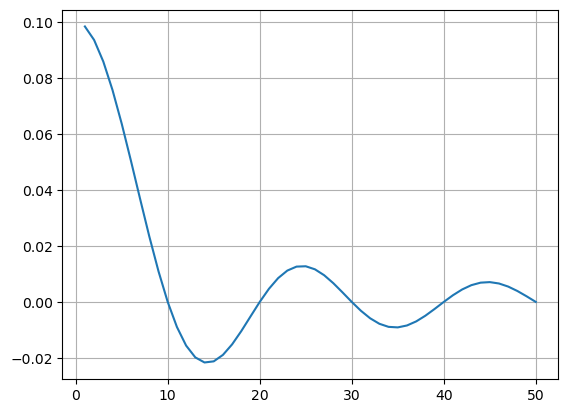

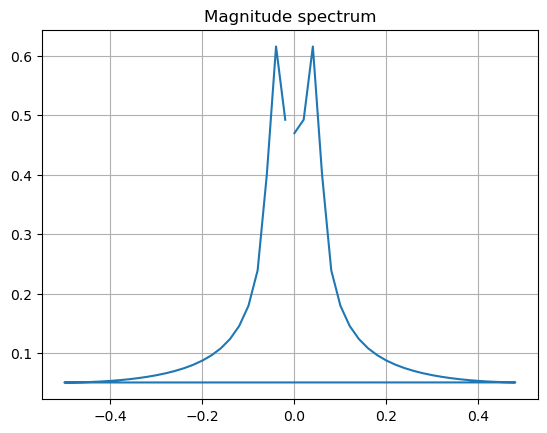

/usr/lib/python3/dist-packages/matplotlib/cbook/__init__.py:1369: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


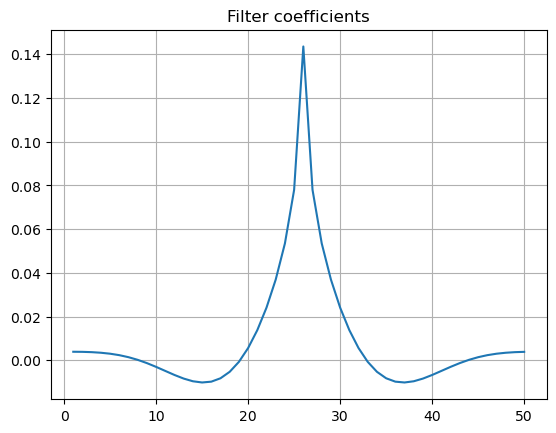

[ 0.14352497+0.00000000e+00j  0.07793392+0.00000000e+00j
  0.05343493+2.19327696e-18j  0.03690386+9.95258299e-19j
  0.02407661-4.66971725e-18j  0.01377157-1.56031706e-18j
  0.00556526-3.65695543e-18j -0.00074056-3.82573235e-19j
 -0.00529225+5.02317270e-18j -0.00824844+1.50274351e-18j
 -0.00980098+0.00000000e+00j -0.01017529+3.95564613e-18j
 -0.00962033+1.10643746e-18j -0.00839336+4.05993152e-18j
 -0.0067433 +2.59892869e-18j -0.00489513+4.54950388e-18j
 -0.00303738+2.35250659e-20j -0.00131381-6.95712199e-19j
  0.00017998-4.83350666e-18j  0.00139499-1.61537424e-18j
  0.00232283+0.00000000e+00j  0.00298623+4.24235320e-20j
  0.00342741-1.68984413e-18j  0.00369566-7.18221187e-18j
  0.00383581-3.02582943e-19j  0.00387885+8.65170280e-19j
  0.00383581+2.85174584e-18j  0.00369566+3.25227178e-18j
  0.00342741-7.06393308e-19j  0.00298623-3.49294021e-18j
  0.00232283+0.00000000e+00j  0.00139499+1.65567202e-18j
  0.00017998+2.53369524e-18j -0.00131381+4.68178199e-18j
 -0.00303738+3.49989778e-19j -0

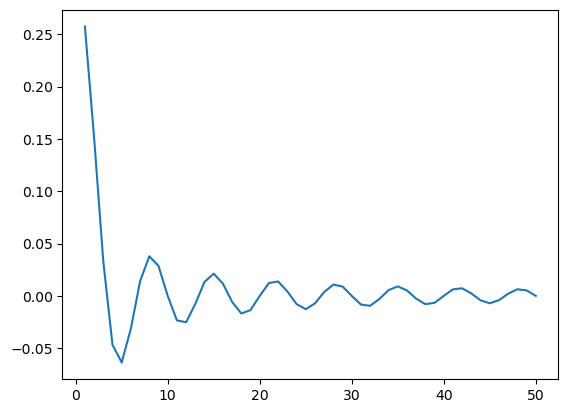

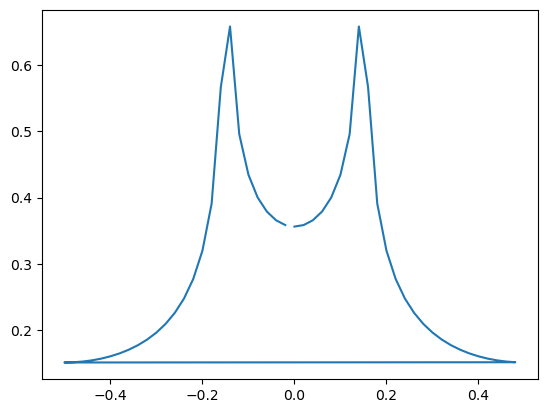

In [2]:
N=50
n = np.arange(1,N+1)

#0.1pi
wc = 0.1*np.pi
hn = np.sin(wc*n)/(np.pi*n)
plt.plot(n, hn)
plt.grid()
plt.show()
Hf = np.fft.fft(hn)
f = np.fft.fftfreq(hn.size, 1)
plt.plot(f,np.abs(Hf))
#As original time-domain signal is not symmetric, we have non-uniform phase shift produced by the filter. We can visualise this by plt.plot(f, np.angle(Hf))
#Let's aim to get a filter with no phase distortion... For this we discard the phase part, and do ifft of just the magnitude part.
#We expect a symmeytric filter coefficient h[n] for this filter.
plt.grid()
plt.title("Magnitude spectrum")
plt.show()
#Computation of filter coefficients for filter with no phase distortion
hn_ = np.fft.ifft(np.abs(Hf))
plt.plot(n, np.fft.fftshift(hn_))
plt.grid()
plt.title("Filter coefficients")
plt.show()
print(hn_)
#On this hn_ we can apply hamming or kaiser windows


#0.3pi
wc = 0.3*np.pi
hn = np.sin(wc*n)/(np.pi*n)
plt.plot(n, hn)
plt.show()
Hf = np.fft.fft(hn)
f = np.fft.fftfreq(hn.size, 1)
plt.plot(f,np.abs(Hf))
plt.show()


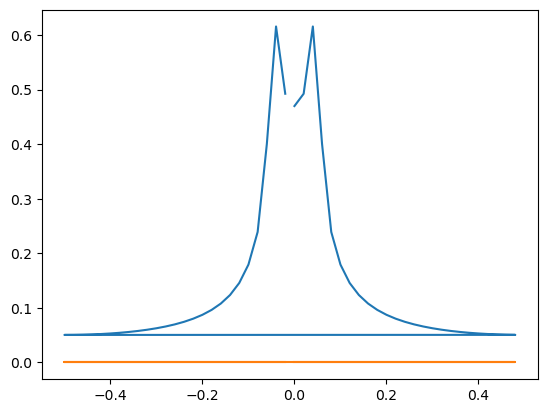

In [3]:
plt.plot(f, np.abs(np.fft.fft(hn_)), f, np.angle(np.fft.fft(hn_)))